In [ ]:
from aux import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris




In [2]:
#load data 
# 

X = load_iris()
X, y = X['data'], X['target']

Y = np.zeros((len(y), 3), dtype=int)
for i, _ in enumerate(y):
    Y[i, _] = 1

p = np.random.permutation(len(X))

X, Y = X[p], Y[p]

X_train, X_test = [x for x in X[:100]], [x for x in X[100:]]
Y_train, Y_test = [y for y in Y[:100]], [y for y in Y[100:]]

In [7]:
# load NN

NN = NeuralNetwork([4,5,6,7,3])

costs = NN.train_adam(X_train, Y_train, max_it = 1e5)

Y_true, Y_candidate = NN.accuracy(X_train, Y_train)
Y_true_test, Y_candidate_test = NN.accuracy(X_test, Y_test)


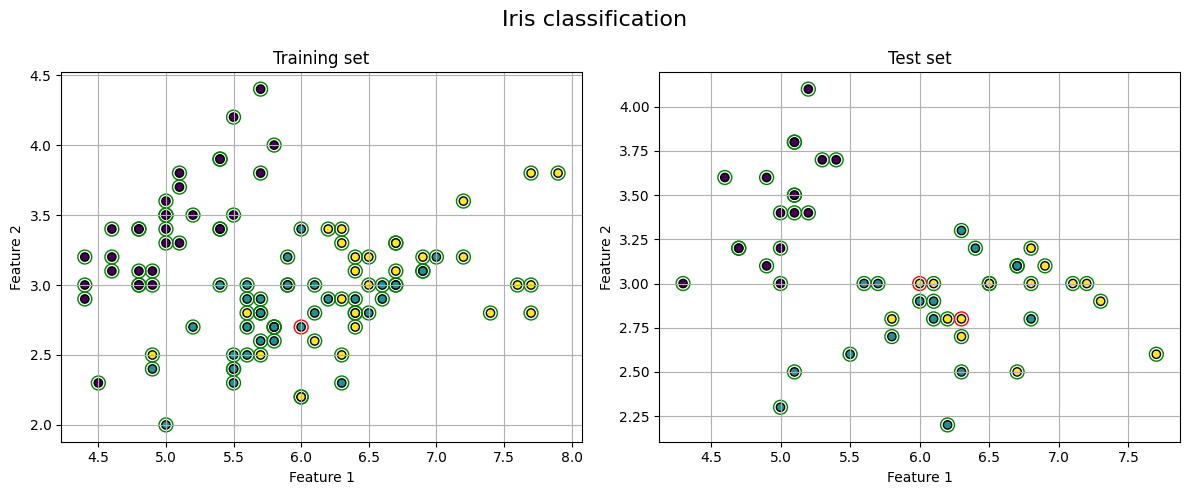

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 5))

# True labels
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_true, cmap="viridis", edgecolor="k")
correct = Y_true == Y_candidate
incorrect = ~correct
plt.scatter(X_train[correct, 0], X_train[correct, 1], facecolors='none', edgecolors='green', s=100, label="Correct")
plt.scatter(X_train[incorrect, 0], X_train[incorrect, 1], facecolors='none', edgecolors='red', s=100, label="Incorrect")
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_true_test, cmap="viridis", edgecolor="k")
correct = Y_true_test == Y_candidate_test
incorrect = ~correct
plt.scatter(X_test[correct, 0], X_test[correct, 1], facecolors='none', edgecolors='green', s=100, label="Correct")
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], facecolors='none', edgecolors='red', s=100, label="Incorrect")
plt.title("Test set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# Add overall title and show plot
plt.suptitle('Iris classification', fontsize=16)
plt.tight_layout()
plt.show()

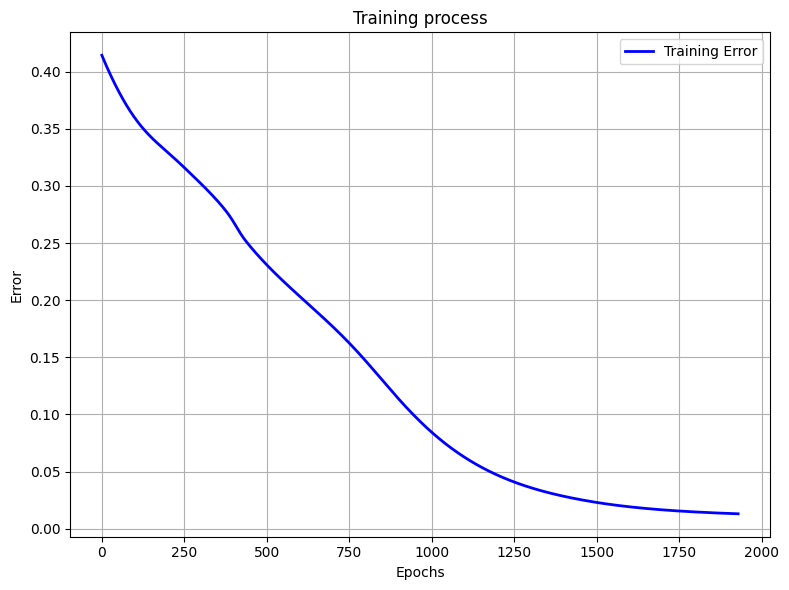

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(costs, label="Training Error", color="blue", linewidth=2)
plt.title("Training process")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

